In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:\\Users\\magst\\Desktop\\catanddog\\PetImages\\"
CATEGORIES = ["Dog", "Cat"]
#"C:\\Users\\magst\\Desktop\\NAIP\\pred\\"

#DATADIR = "E:\\MTBSFirePeri_NN_5_23\\scratch\\"
#CATEGORIES = ["breached", "held"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

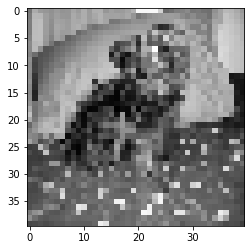

In [3]:
IMG_SIZE = 40
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:42<00:00, 295.44it/s]

24946


In [5]:
training_data

[[array([[110, 157, 142, ..., 165, 155, 141],
         [116, 166, 165, ..., 169, 160, 147],
         [119, 169, 172, ..., 174, 165, 153],
         ...,
         [115, 133, 143, ...,  88,  81,  70],
         [131, 104,  89, ...,  82,  80,  78],
         [ 73,  76,  82, ...,  78,  76,  65]], dtype=uint8),
  0],
 [array([[ 98,  69,  79, ...,  99,  71,  86],
         [ 97,  83, 101, ...,   2,  84,  91],
         [110, 152, 128, ...,   4,  26,  71],
         ...,
         [245, 243, 238, ..., 226, 210, 224],
         [248, 249, 250, ..., 243, 234, 228],
         [239, 241, 247, ..., 244, 240, 234]], dtype=uint8),
  0],
 [array([[108, 105, 122, ..., 124, 123, 122],
         [128, 119, 129, ..., 124, 123, 121],
         [155, 172, 158, ..., 125, 122, 119],
         ...,
         [206, 208, 202, ..., 100,  99,  98],
         [196, 194, 194, ...,  97,  97,  93],
         [209, 204, 193, ...,  94,  91,  95]], dtype=uint8),
  0],
 [array([[186, 182, 184, ...,  45,  37,  43],
         [183, 183, 1

In [6]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])
    
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

1
0
1
0
0
1
0
1
0
0


In [7]:
len(X)

24946

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#import pickle

#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

#model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#model.fit(X, y, batch_size=4, epochs=1)#, validation_split=0.3)

In [24]:
## Eh
print(model.summary())  
    
 
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[0].name, filters.shape)

   
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    

#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
#conv_layer_index = [1, 3, 6]  #TO define a shorter model
conv_layer_index = [1, 2, 3]  #TO define a shorter model

#outputs = [model.layers[i].output for i in conv_layer_index]
model_short = model(inputs=model.inputs)#, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from keras.preprocessing.image import load_img, img_to_array
img = load_img("C:\\Users\\magst\\Desktop\\Derp.JPG", target_size=(224, 224)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)


columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 38, 38, 128)       1280      
_________________________________________________________________
activation_6 (Activation)    (None, 38, 38, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 256)       295168    
_________________________________________________________________
activation_7 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)            

ValueError: not enough values to unpack (expected 2, got 0)

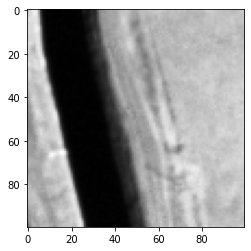

100%|███████████████████████████████████████████████████████████████████████████| 11808/11808 [00:33<00:00, 356.65it/s]

11808


array([[[[115],
         [121],
         [ 18],
         ...,
         [ 81],
         [ 84],
         [ 76]],

        [[121],
         [129],
         [ 23],
         ...,
         [ 79],
         [ 80],
         [ 78]],

        [[138],
         [138],
         [ 36],
         ...,
         [ 77],
         [ 83],
         [ 80]],

        ...,

        [[ 12],
         [ 10],
         [ 11],
         ...,
         [ 67],
         [ 70],
         [ 71]],

        [[ 15],
         [ 11],
         [  9],
         ...,
         [ 67],
         [ 73],
         [ 71]],

        [[ 28],
         [ 14],
         [ 10],
         ...,
         [ 70],
         [ 76],
         [ 77]]],


       [[[ 81],
         [ 68],
         [ 67],
         ...,
         [109],
         [104],
         [100]],

        [[ 79],
         [ 64],
         [ 74],
         ...,
         [114],
         [105],
         [104]],

        [[ 65],
         [ 65],
         [ 75],
         ...,
         [112],
         [

In [8]:
#DATADIR = "C:\\Users\\magst\\Desktop\\catanddog\\"
#DATADIR = "C:\\Users\\magst\\Desktop\\NAIP\\pred\\"

#CATEGORIES = ["prediction"]

DATADIR = "C:\\Users\\magst\\Desktop\\NAIP\\pred\\prediction\\"
CATEGORIES = ["tree", "notree"]
#DATADIR = "C:\\Users\\magst\\Desktop\\NAIP\\"
#CATEGORIES = ["Output"]



for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

import random

random.shuffle(training_data)

#for sample in training_data[:10]:
 #   print(sample)
    
X = []
#y = []

for features,label in training_data:
    X.append(features)
    #y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X
#y = np.array(y)

In [9]:
#pred = model.predict_classes(X, batch_size=10)
pred = model.predict_classes(X, batch_size=10)

images = np.vstack([X])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
pred[1:100]

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

[0]


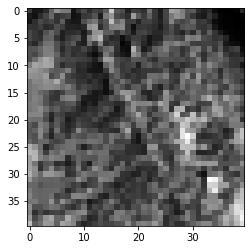

[0]


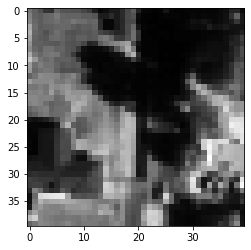

[0]


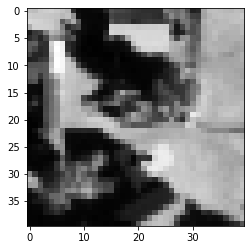

[1]


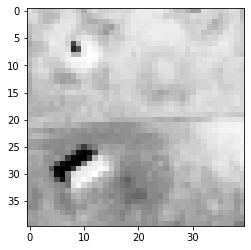

[0]


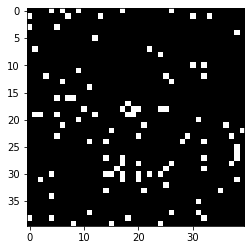

[1]


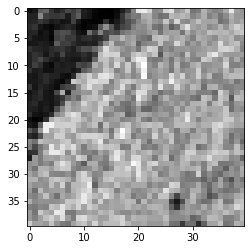

[0]


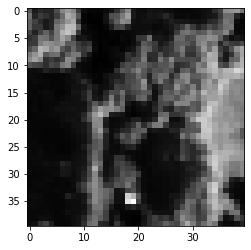

[1]


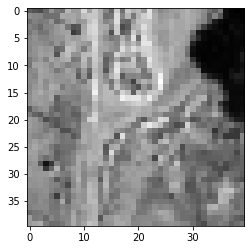

[0]


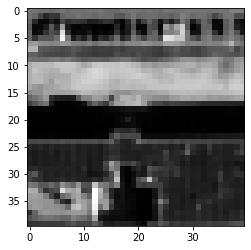

[1]


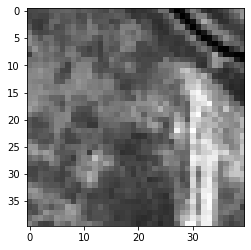

[1]


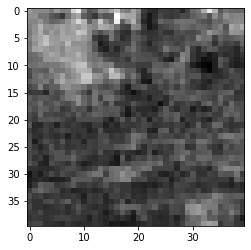

[0]


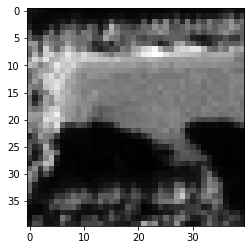

[1]


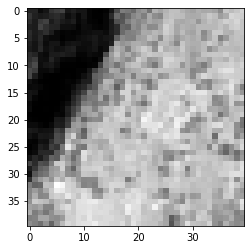

[1]


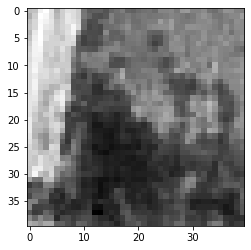

[1]


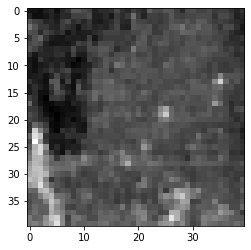

[0]


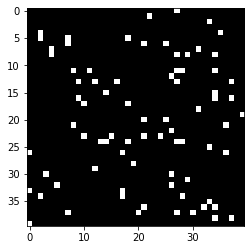

[0]


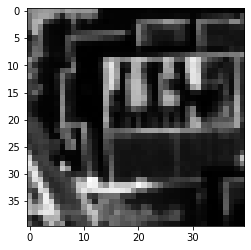

[1]


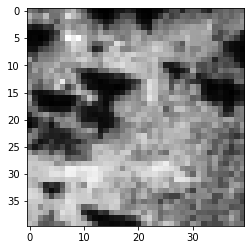

[1]


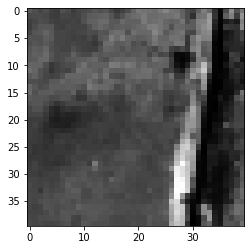

[1]


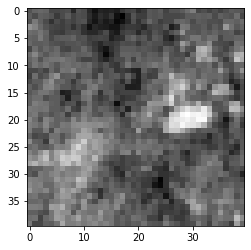

[0]


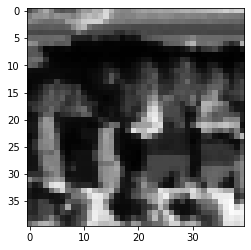

[0]


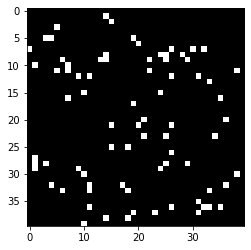

[0]


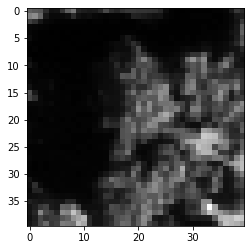

[1]


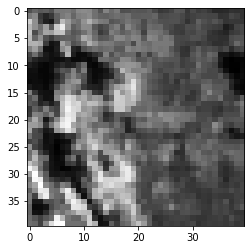

[0]


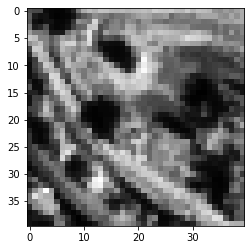

[1]


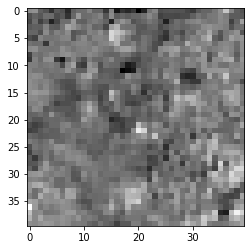

[0]


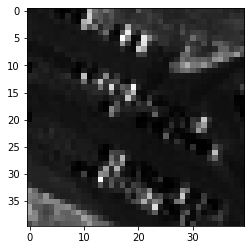

[1]


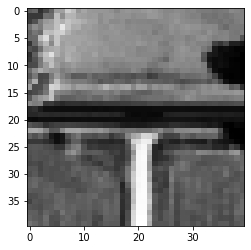

[1]


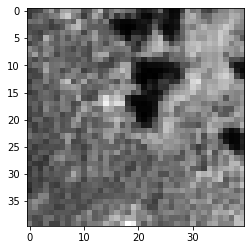

[0]


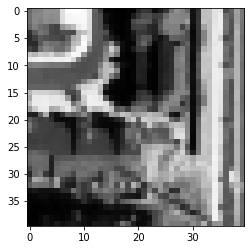

[0]


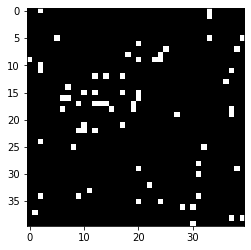

[0]


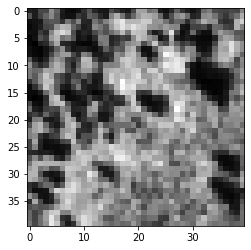

[0]


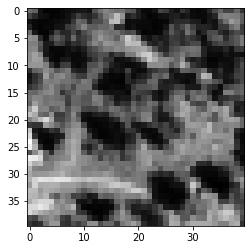

[1]


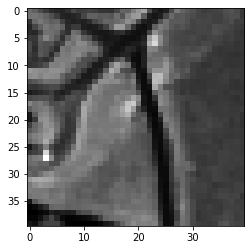

[1]


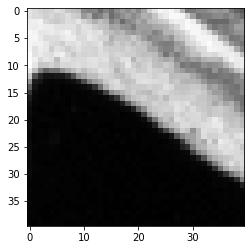

[1]


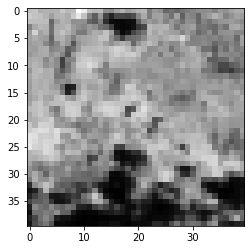

[0]


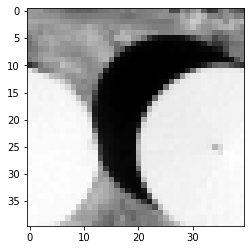

[0]


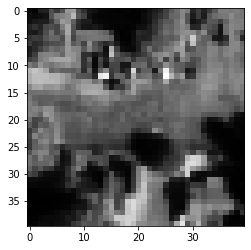

[0]


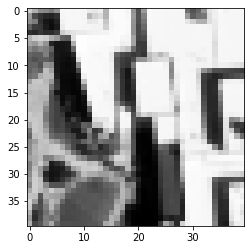

[0]


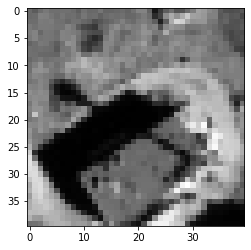

[0]


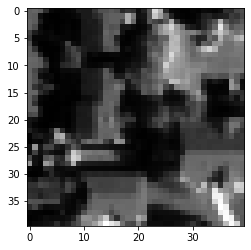

[1]


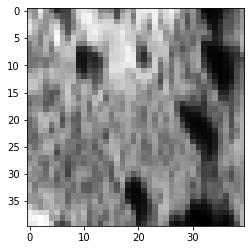

[0]


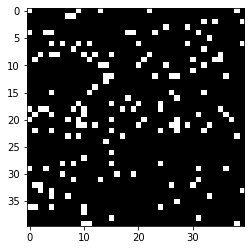

[0]


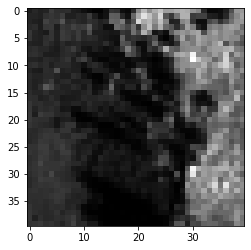

[1]


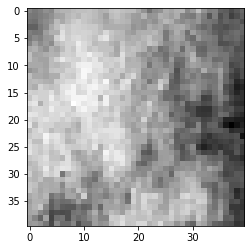

[0]


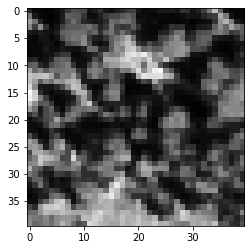

[1]


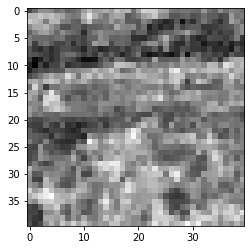

[0]


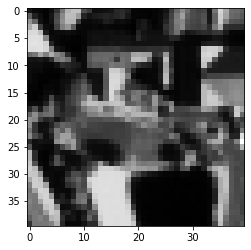

[1]


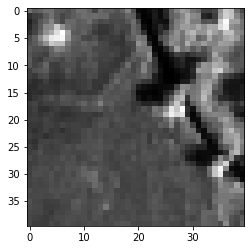

[1]


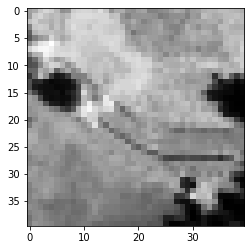

[1]


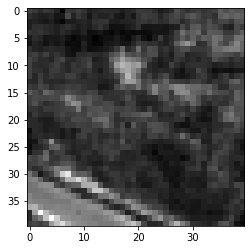

[1]


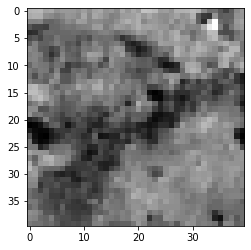

[1]


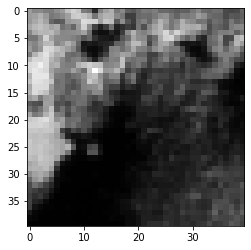

[0]


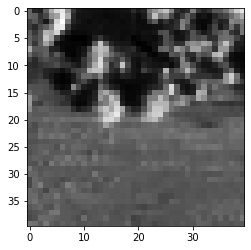

[0]


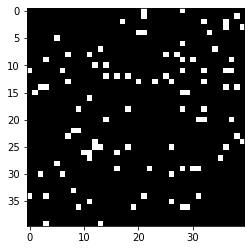

[1]


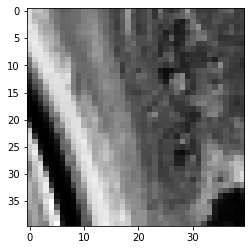

[1]


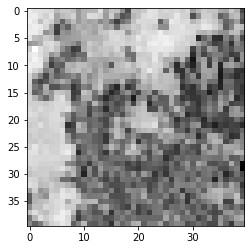

[0]


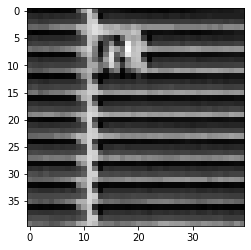

[1]


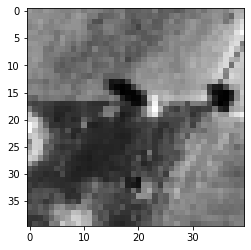

[0]


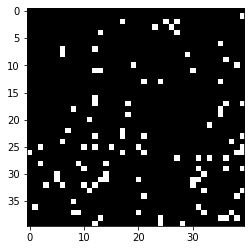

[0]


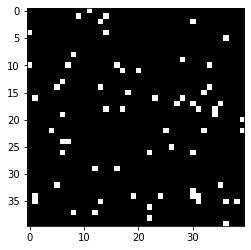

[0]


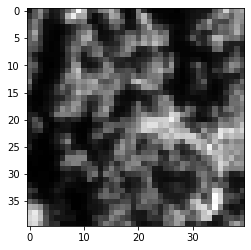

[1]


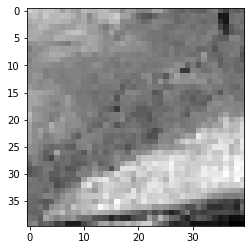

[1]


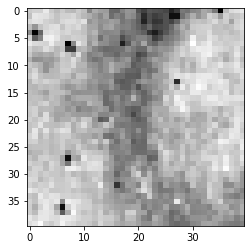

[0]


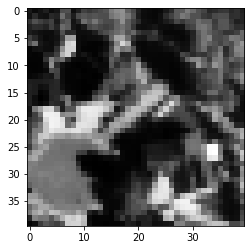

[1]


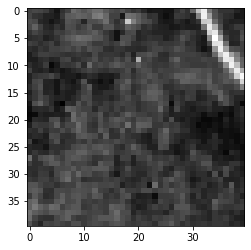

[1]


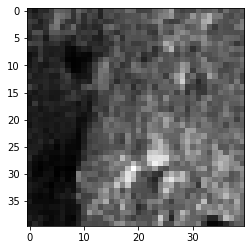

[0]


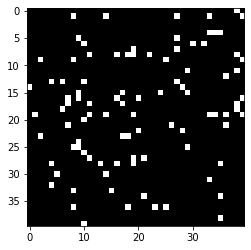

[1]


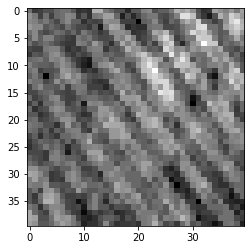

[1]


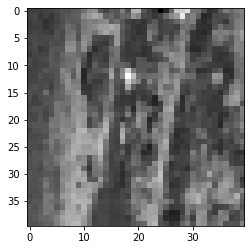

[0]


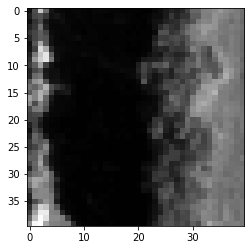

[1]


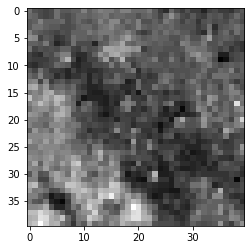

[1]


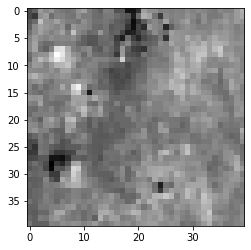

[1]


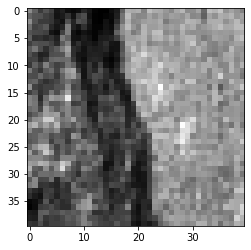

[0]


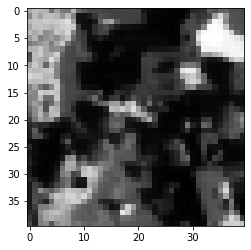

[0]


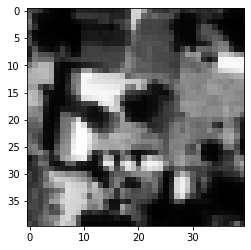

[0]


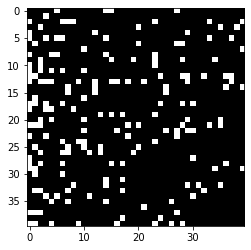

[1]


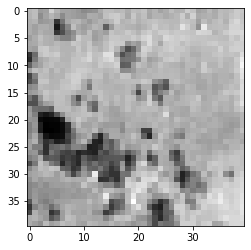

[0]


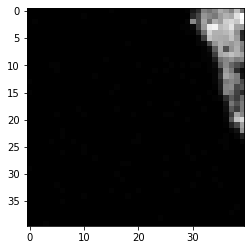

[1]


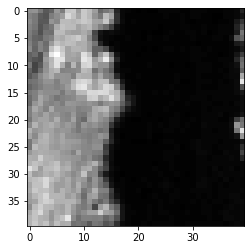

[1]


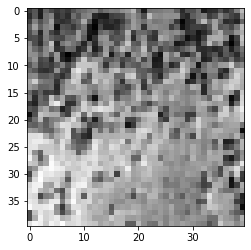

[0]


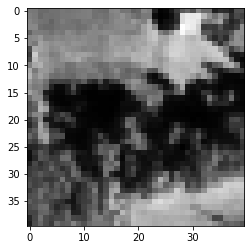

[0]


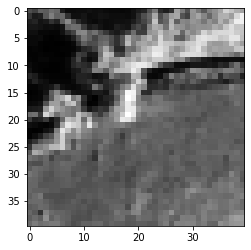

[1]


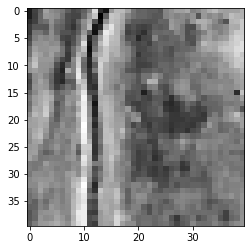

[0]


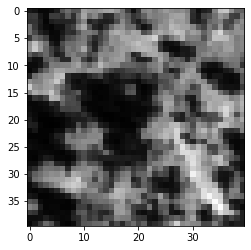

[0]


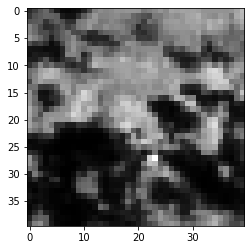

[0]


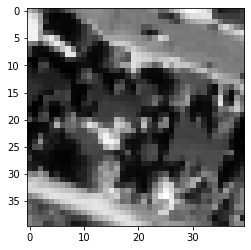

[1]


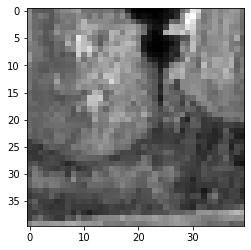

[0]


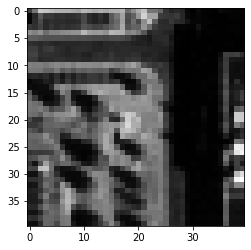

[1]


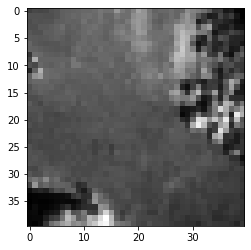

[1]


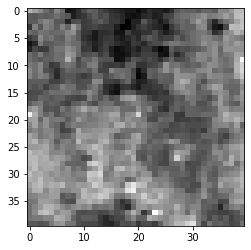

[1]


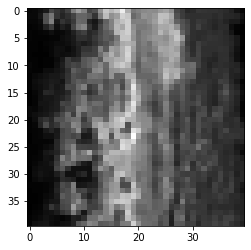

[0]


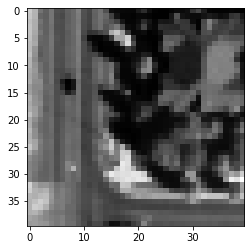

[0]


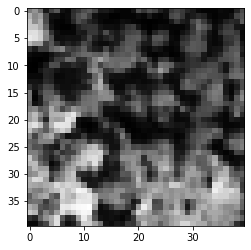

[1]


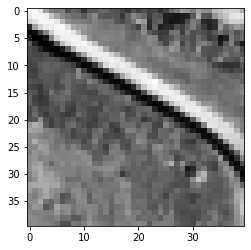

[0]


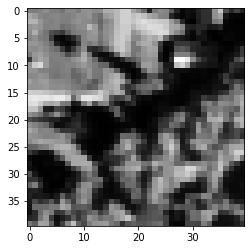

[1]


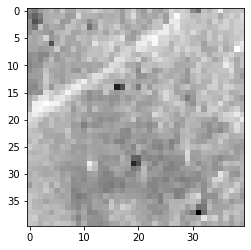

[1]


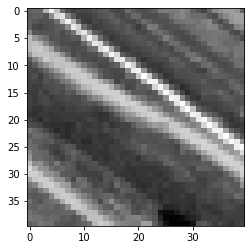

[1]


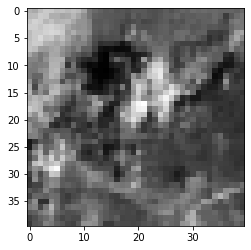

[1]


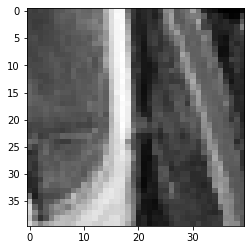

In [251]:

for i in range(0,100):
    print(pred[i])
    plt.imshow(images[i], cmap='gray')  # graph it
    plt.show()





In [11]:
plt.imshow(images[6], cmap='gray')  # graph it
print(pred[6])
plt.show()

NameError: name 'images' is not defined

In [255]:
type(images[6])

numpy.ndarray

# CNN data prep

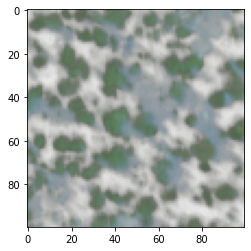

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


#DATADIR = "C:\\Users\\magst\\Desktop\\catanddog\\"
#DATADIR = "C:\\Users\\magst\\Desktop\\NAIP\\pred\\"

#CATEGORIES = ["prediction"]

DATADIR = "C:\\Users\\magst\\Desktop\\NAIP\\pred\\prediction\\"
CATEGORIES = ["tree", "notree"]
#DATADIR = "C:\\Users\\magst\\Desktop\\NAIP\\"
#CATEGORIES = ["Output"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_LOAD_GDAL)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

# Make Training Data


In [7]:
    
training_data = []

IMG_SIZE = 100

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_LOAD_GDAL)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

import random

random.shuffle(training_data)

#for sample in training_data[:10]:
 #   print(sample)
    
XCNN = []
yCNN = []

for features,label in training_data:
    XCNN.append(features)
    yCNN.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

XCNN = np.array(XCNN).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#XCNN
yCNN = np.array(yCNN)

100%|██████████████████████████████████████████████████████████████████████████████| 330/330 [00:00<00:00, 1190.35it/s]

697


array([[[[  4],
         [  5],
         [  2],
         ...,
         [  5],
         [  2],
         [ 39]],

        [[  5],
         [  4],
         [  2],
         ...,
         [ 18],
         [ 10],
         [ 85]],

        [[ 17],
         [ 20],
         [ 12],
         ...,
         [ 34],
         [ 16],
         [133]],

        ...,

        [[  8],
         [  9],
         [  5],
         ...,
         [  7],
         [  4],
         [ 53]],

        [[ 10],
         [ 12],
         [  5],
         ...,
         [ 19],
         [ 12],
         [ 85]],

        [[ 20],
         [ 26],
         [ 15],
         ...,
         [  8],
         [  3],
         [ 54]]],


       [[[ 25],
         [ 33],
         [ 17],
         ...,
         [  9],
         [  5],
         [ 53]],

        [[  8],
         [  8],
         [  5],
         ...,
         [ 12],
         [  5],
         [ 69]],

        [[ 13],
         [ 15],
         [  8],
         ...,
         [ 13],
         [

In [8]:
yCNN = yCNN.iloc[:,0:1].values


yCNN = ohe.fit_transform(yCNN).toarray()

yCNN


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

# Make CNN Model

In [111]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

#import pickle

#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)

XCNN = XCNN/255.0

modelCNN = Sequential()

modelCNN.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
modelCNN.add(Activation('relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))

modelCNN.add(Conv2D(256, (3, 3)))
modelCNN.add(Activation('relu'))
modelCNN.add(MaxPooling2D(pool_size=(2, 2)))

modelCNN.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

modelCNN.add(Dense(64))

modelCNN.add(Dense(2))
#model.add(Activation('sigmoid'))
#model.add(Activation('sigmoid'))
#model.add(Activation('softmax'))

modelCNN.compile(loss='binary_crossentropy',
              #optimizer = Adam(learning_rate=0.001),
              optimizer = Adam(),
              metrics=['accuracy'])

modelCNN.fit(XCNN, yCNN, batch_size=24, epochs=1)#, validation_split=0.3)

30/30 [==============================] - 3s 116ms/step - loss: 7.3031 - accuracy: 0.5509


# MLP  Data Prep

In [112]:
import pandas as pd
df = pd.read_csv("C:\\Users\\magst\\Desktop\\ADS\\flightlogs\\7BH_0707_1350_data_SM.csv")
#df = df.dropna()
#df1= df[df["Binary"]==1]
#df0= df[df["Binary"]==0]
#df0=df0.sample(len(df1))
#df = df1.append(df0, ignore_index = True)

#df = df.sample(frac=1)

XMLP = df.loc[:, ['Altitude',
       'Speed', 'Direction']]

yMLP = df.iloc[:,8:9].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
XMLP = sc.fit_transform(XMLP)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
yMLP = ohe.fit_transform(yMLP).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XMLP,yMLP,test_size = 0.33)

# Make MLP Model

In [113]:
import keras
from keras import Sequential 
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

modelMLP = Sequential()
modelMLP.add(Dense(322, activation = "tanh"))
modelMLP.add(Dense(31, activation = "relu"))
modelMLP.add(Dense(491, activation = "relu"))
modelMLP.add(Dense(2, activation = "softmax"))
modelMLP.compile(loss = "binary_crossentropy",
             optimizer = Adam(learning_rate=0.01),
             metrics = ["accuracy"])

history = modelMLP.fit(X_train, y_train, epochs = 2, batch_size = 64, validation_data=(X_test, y_test))



Epoch 1/2
8/8 [==============================] - 0s 13ms/step - loss: 0.3039 - accuracy: 0.8884 - val_loss: 0.0673 - val_accuracy: 0.9784
Epoch 2/2
8/8 [==============================] - 0s 3ms/step - loss: 0.0734 - accuracy: 0.9785 - val_loss: 0.0739 - val_accuracy: 0.9784


In [123]:

combinedInput = concatenate([modelMLP.output, modelCNN.output])


x = Dense(2, activation="relu")(combinedInput)
x = Dense(2, activation="sigmoid")(x)

In [124]:
modelFIN = Model(inputs=[modelMLP.input, modelCNN.input], outputs=x)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
modelFIN.compile(loss="binary_crossentropy", metrics=['acc'], optimizer=opt)

In [127]:
yCNN

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [125]:
model1_history = modelFIN.fit(
  [XCNN, XMLP], 
  [yCNN, yMLP], 
  #validation_data=([XCNN, XMLP], testY), 
  epochs=5, 
  batch_size=10)

Epoch 1/5


ValueError: in user code:

    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\magst\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer conv2d_75 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 3]


In [59]:
from keras.layers import Flatten, Input, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Model

def create_cnn(width, height, depth, filters=(16, 32, 64), regularizer=None):
    """
    Creates a CNN with the given input dimension and filter numbers.
    """
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    inputShape = (height, width, depth)
    chanDim = -1
 
    # Define the model input
    inputs = Input(shape=inputShape)
 
    # Loop over the number of filters 
    for (i, f) in enumerate(filters):
        # If this is the first CONV layer then set the input appropriately
        if i == 0:
            x = inputs
 
        # Create loops of CONV => RELU => BN => POOL layers
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        
    # Final layers - flatten the volume, then Fully-Connected => RELU => BN => DROPOUT
    x = Flatten()(x)
    x = Dense(16, kernel_regularizer=regularizer)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)
 
    # Apply another fully-connected layer, this one to match the number of nodes coming out of the MLP
    x = Dense(4, kernel_regularizer=regularizer)(x)
    x = Activation("relu")(x)
 
    # Construct the CNN
    model = Model(inputs, x)
 
    # Return the CNN
    return model